In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from os import listdir
from os.path import isfile, join

def Get_LSTM_Files(model,simulation):
    episode=100
    lstm_files = []
    while isfile('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(model,simulation,episode)):
        #lstm_files.append('lstm_states_{}_model_eps:{}.h5.npy'.format(simulation,episode))
        lstm_files.append(episode)
        episode+=100
    return lstm_files

def calculate_PRC_mean(model,simulation,neuron,version=None):
    if version is not None:
        
        x = np.load('output/{}/PRC_data/lstm_states_{}_model_eps:{}.h5.npy'.format(model,simulation,version))
    else:
        x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    x = x.mean(axis=0)
    
    yt = x[:,neuron]
    
    difference = yt[1:]-yt[:-1]
    if version is not None:
        z= np.zeros(319)
        z.fill(version)
    else:
        z = np.zeros(320)
        for j in range(1,8):
            z[j*40:j*40+40]=j
        z = z[:-1]
        z = z*40
    return yt[1:],difference,z

def calculate_PRC(model,simulation,neuron):
    x = np.load('output/{}/lstm_states_{}.npy'.format(model,simulation))
    
    yt = x[:,:,neuron]
    print(yt.shape)
    difference = yt[:,1:]-yt[:,:-1]
    
    z = np.zeros((yt.shape[0],320))
    for j in range(1,8):
        z[:,j*40:j*40+40]=j
    z = z[:,:-1]
    z = z*40
    return yt[:,1:],difference,z

In [38]:
def Plot_PRC_versions(model,simulation,day,neuron):
    #Getting available mid-point
    versions = Get_LSTM_Files(model,simulation)
    v = len(versions)
    yt = np.zeros((v,319))
    difference = np.zeros((v,319))
    z = np.zeros((v,319))
    number = np.zeros(v)
    for i in range(v):#0,v,10):
        yt[i],difference[i],z[i] = calculate_PRC_mean(64,0,neuron,version=versions[i])
        number[i]= versions[i]
    
    #Generate 8 colors
    colors = plt.cm.jet(np.linspace(0,1,v))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    wday_start = 40*day-1
    wday_end= wday_start+40
    #for i in range(v):
    #    ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    #ax = fig.add_subplot(2,1,2, projection='3d')
    for i in range(v):
        ax.scatter(yt[i,wday_start:wday_end],difference[i,wday_start:wday_end],z[i,wday_start:wday_end],color=colors[i])
    plt.show()

<IPython.core.display.Javascript object>


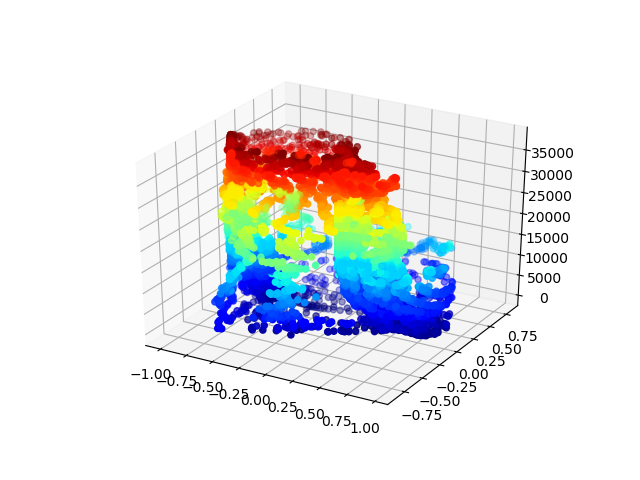

In [39]:
Plot_PRC_versions(64,0,5,43)


#ax.plot(yt[0],difference[0],z[0],color=colors[i])
x = np.zeros(319)
x.fill(-0.4)
y = np.zeros(319)
#ax.plot(x,y,z,'--')#,color='r')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#for i in range(8):
    

for i in range(8):
    ax.plot(yt[i*40:i*40+40],difference[i*40:i*40+40],z[i*40:i*40+40],color=colors[i])
x = np.zeros(319)
x.fill(-0.4)
y = np.zeros(319)
ax.plot(x,y,z,'--')#,color='r')
#plt.axis('off')